In [1]:
import numpy as np
import pandas as pd 
import os 

In [2]:
path = os.getcwd()
path

'/home/pib3/Projetos/tuh_eeg_seizures/tuh_seizures/scripts'

In [3]:
emg_w = np.load(path+'/EMG_com_crise.npy')
emg_n = np.load(path+'/EMG_sem_crise.npy')

In [4]:
from scipy.stats import skew, kurtosis

fs = 256 

def energy_(x):
    return np.sum(np.abs(x)**2)

def curtose(s, fs):
    m = np.array([kurtosis(s[i*fs:(i+1)*fs]) for i in range((len(s)//fs)-1)])
    return m

def assimetria(s, fs):
    m = np.array([skew(s[i*fs:(i+1)*fs]) for i in range((len(s)//fs)-1)])
    return m

def variancia(s, fs):
    m = np.array([np.var(s[i*fs:(i+1)*fs]) for i in range((len(s)//fs)-1)])
    return m

def energia(s, fs):
    m = np.array([energy_(s[i*fs:(i+1)*fs]) for i in range((len(s)//fs)-1)])
    return m

In [5]:
cw = curtose(emg_w,fs)
sw = assimetria(emg_w,fs)
vw = variancia(emg_w,fs)
ew = energia(emg_w,fs)

cn = curtose(emg_n,fs)
sn = assimetria(emg_n,fs)
vn = variancia(emg_n,fs)
en = energia(emg_n,fs)

In [6]:
col = ["Kurtosis","Skewness","Variance","Energy"]

d1 = np.array([cw,sw,vw,ew]).T
d2 = np.array([cn,sn,vn,en]).T
d = np.vstack((d1,d2))
 
D = pd.DataFrame(data=d,columns=col)
D['Seizure'] = np.hstack((np.repeat('Yes',d1.shape[0]),np.repeat('No',d1.shape[0])))
D['Class'] = np.hstack((
    np.zeros(d1.shape[0]).astype('int'),
    np.ones(d1.shape[0]).astype('int')))

D.head()

,Kurtosis,Skewness,Variance,Energy,Seizure,Class
0,16.482734,-2.987539,8371.063325,2.537706e+06,Yes,0
1,1.399874,-0.292664,14376.252855,3.885460e+06,Yes,0
2,10.392456,2.464955,13528.626968,4.478984e+06,Yes,0
3,3.341172,1.675665,62716.621329,1.662288e+07,Yes,0
4,8.501505,2.587727,26090.585548,6.791829e+06,Yes,0


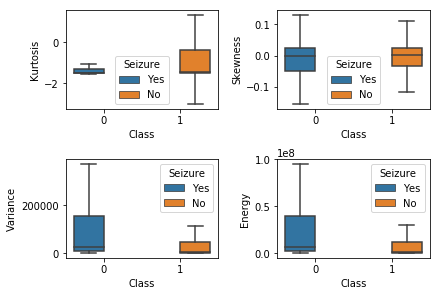

In [9]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import seaborn as sns

fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
sns.boxplot(x='Class',y='Kurtosis',hue="Seizure",data=D,showfliers=False,ax=ax1)

ax2 = fig.add_subplot(gs[0,1])
sns.boxplot(x='Class',y='Skewness',hue="Seizure",data=D,showfliers=False,ax=ax2)

ax3 = fig.add_subplot(gs[1,0])
sns.boxplot(x='Class',y='Variance',hue="Seizure",data=D,showfliers=False,ax=ax3)

ax4 = fig.add_subplot(gs[1,1])
sns.boxplot(x='Class',y='Energy',hue="Seizure",data=D,showfliers=False,ax=ax4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f092b1e1c18>,
 'caps': [<matplotlib.lines.Line2D at 0x7f092b1862e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f092b1e1828>,
 'medians': [<matplotlib.lines.Line2D at 0x7f092b186978>,
 'fliers': [],
 'means': []}

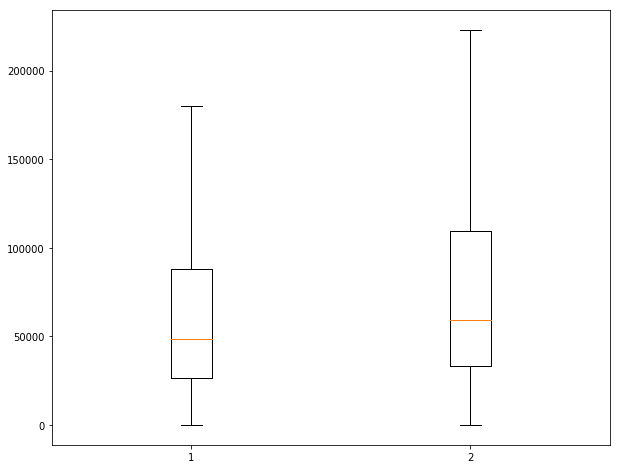

In [10]:
from scipy.fftpack import fft

y1 = fft(emg_w)
y2 = fft(emg_n)
fig = plt.figure(figsize=(10,8))
plt.boxplot([np.abs(y1),np.abs(y2)],showfliers=False)

